<a href="https://colab.research.google.com/github/Guhan2348519/lab-task/blob/main/Research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/taiwan/data augmentation/Train',
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical'
)

Found 3050 images belonging to 6 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/taiwan/Preprocessed data/Test',
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 127 images belonging to 6 classes.


In [ ]:
# Define the ANN model
model_ann = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(256, 256, 3)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])
# Compile the ANN model
model_ann.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Train the ANN model
history_ann = model_ann.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size
)

Epoch 1/10
95/95 [==============================] - 729s 8s/step - loss: 21.4910 - accuracy: 0.3062 - val_loss: 43.0783 - val_accuracy: 0.3750
Epoch 2/10
95/95 [==============================] - 15s 157ms/step - loss: 7.2265 - accuracy: 0.3834 - val_loss: 30.9663 - val_accuracy: 0.3021
Epoch 3/10
95/95 [==============================] - 15s 156ms/step - loss: 6.5806 - accuracy: 0.4165 - val_loss: 20.1351 - val_accuracy: 0.3854
Epoch 4/10
95/95 [==============================] - 15s 158ms/step - loss: 4.1961 - accuracy: 0.4211 - val_loss: 12.6033 - val_accuracy: 0.3125
Epoch 5/10
95/95 [==============================] - 15s 161ms/step - loss: 3.6432 - accuracy: 0.4553 - val_loss: 11.5019 - val_accuracy: 0.3958
Epoch 6/10
95/95 [==============================] - 15s 156ms/step - loss: 1.9039 - accuracy: 0.5152 - val_loss: 6.4853 - val_accuracy: 0.4688
Epoch 7/10
95/95 [==============================] - 15s 153ms/step - loss: 1.6653 - accuracy: 0.5302 - val_loss: 7.3906 - val_accuracy: 0.

In [ ]:
# Define the CNN model
model_cnn = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])
# Compile the CNN model
model_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Train the CNN model
history_cnn = model_cnn.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size
)

Epoch 1/10
95/95 [==============================] - 24s 183ms/step - loss: 2.1139 - accuracy: 0.3121 - val_loss: 2.6021 - val_accuracy: 0.3125
Epoch 2/10
95/95 [==============================] - 16s 169ms/step - loss: 1.2420 - accuracy: 0.4738 - val_loss: 2.9173 - val_accuracy: 0.3542
Epoch 3/10
95/95 [==============================] - 16s 165ms/step - loss: 1.0041 - accuracy: 0.5868 - val_loss: 3.5460 - val_accuracy: 0.5208
Epoch 4/10
95/95 [==============================] - 16s 168ms/step - loss: 0.7875 - accuracy: 0.6918 - val_loss: 3.9724 - val_accuracy: 0.6042
Epoch 5/10
95/95 [==============================] - 15s 161ms/step - loss: 0.5689 - accuracy: 0.7840 - val_loss: 4.2645 - val_accuracy: 0.6458
Epoch 6/10
95/95 [==============================] - 16s 163ms/step - loss: 0.4118 - accuracy: 0.8436 - val_loss: 4.6800 - val_accuracy: 0.6354
Epoch 7/10
95/95 [==============================] - 16s 168ms/step - loss: 0.2906 - accuracy: 0.8917 - val_loss: 5.3585 - val_accuracy: 0.6875

In [ ]:

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix

# Data generators
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/taiwan/data augmentation/Train',
    target_size=(224, 224),  # Adjusted size for MobileNetV2
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/taiwan/data augmentation/Train',
    target_size=(224, 224),  # Adjusted size for MobileNetV2
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/taiwan/Preprocessed data/Test',
    target_size=(224, 224),  # Adjusted size for MobileNetV2
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Define the MobileNetV2 model
base_model_mobilenet = tf.keras.applications.MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights="imagenet")
base_model_mobilenet.trainable = False

model_tl_mobilenet = tf.keras.Sequential([
    base_model_mobilenet,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(6, activation='softmax')
])

# Compile the MobileNetV2 model
model_tl_mobilenet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the MobileNetV2 model
history_tl_mobilenet = model_tl_mobilenet.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

# Evaluate the MobileNetV2 model on the test data
test_loss_tl_mobilenet, test_accuracy_tl_mobilenet = model_tl_mobilenet.evaluate(test_generator)
print("MobileNetV2 Transfer Learning Test Accuracy:", test_accuracy_tl_mobilenet)

Found 2443 images belonging to 6 classes.
Found 607 images belonging to 6 classes.
Found 127 images belonging to 6 classes.
Epoch 1/10
76/76 [==============================] - 20s 195ms/step - loss: 1.1415 - accuracy: 0.5342 - val_loss: 0.9336 - val_accuracy: 0.6493
Epoch 2/10
76/76 [==============================] - 14s 178ms/step - loss: 0.6383 - accuracy: 0.7487 - val_loss: 0.9571 - val_accuracy: 0.6510
Epoch 3/10
76/76 [==============================] - 13s 177ms/step - loss: 0.4991 - accuracy: 0.8084 - val_loss: 0.8529 - val_accuracy: 0.6927
Epoch 4/10
76/76 [==============================] - 14s 180ms/step - loss: 0.4357 - accuracy: 0.8457 - val_loss: 0.8555 - val_accuracy: 0.7153
Epoch 5/10
76/76 [==============================] - 13s 176ms/step - loss: 0.3723 - accuracy: 0.8723 - val_loss: 0.8582 - val_accuracy: 0.6771
Epoch 6/10
76/76 [==============================] - 14s 182ms/step - loss: 0.3437 - accuracy: 0.8801 - val_loss: 0.8587 - val_accuracy: 0.6927
Epoch 7/10
76/76 [

In [ ]:
# Transfer Learning with VGG16
base_model_vgg16 = tf.keras.applications.VGG16(input_shape=(256, 256, 3), include_top=False, weights="imagenet")
base_model_vgg16.trainable = False

model_tl_vgg16 = tf.keras.Sequential([
    base_model_vgg16,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(6, activation="softmax")  # Corrected the number of units to 6
])

model_tl_vgg16.summary()

base_learning_rate_vgg16 = 0.0001
model_tl_vgg16.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate_vgg16),
                        loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),  # Changed loss function
                        metrics=['accuracy'])

history_tl_vgg16 = model_tl_vgg16.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size
)

58889256/58889256 [==============================] - 1s 0us/step
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 global_average_pooling2d_3  (None, 512)               0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 dense_9 (Dense)             (None, 6)                 3078      
                                                                 
Total params: 14717766 (56.14 MB)
Trainable params: 3078 (12.02 KB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


Epoch 1/10
95/95 [==============================] - 31s 226ms/step - loss: 1.4506 - accuracy: 0.4231 - val_loss: 2.3009 - val_accuracy: 0.2292
Epoch 2/10
95/95 [==============================] - 18s 188ms/step - loss: 1.1840 - accuracy: 0.5424 - val_loss: 2.4244 - val_accuracy: 0.3646
Epoch 3/10
95/95 [==============================] - 18s 185ms/step - loss: 1.0757 - accuracy: 0.5769 - val_loss: 2.4374 - val_accuracy: 0.3750
Epoch 4/10
95/95 [==============================] - 18s 185ms/step - loss: 1.0119 - accuracy: 0.6054 - val_loss: 2.4420 - val_accuracy: 0.4583
Epoch 5/10
95/95 [==============================] - 18s 183ms/step - loss: 0.9559 - accuracy: 0.6339 - val_loss: 2.4983 - val_accuracy: 0.4479
Epoch 6/10
95/95 [==============================] - 19s 203ms/step - loss: 0.9207 - accuracy: 0.6392 - val_loss: 2.5428 - val_accuracy: 0.4792
Epoch 7/10
95/95 [==============================] - 18s 191ms/step - loss: 0.8950 - accuracy: 0.6521 - val_loss: 2.6002 - val_accuracy: 0.4583

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the data generators for training and testing
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/taiwan/data augmentation/Train',
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical'
)

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/taiwan/Preprocessed data/Test',
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Define the base GoogLeNet (InceptionV3) model
base_model_googlenet = tf.keras.applications.InceptionV3(input_shape=(256, 256, 3), include_top=False, weights="imagenet")
base_model_googlenet.trainable = False

# Create the transfer learning model
model_tl_googlenet = tf.keras.Sequential([
    base_model_googlenet,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(6, activation='softmax')  # Adjusted the number of units to match the number of classes
])

# Compile the model
base_learning_rate_googlenet = 0.0001
model_tl_googlenet.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate_googlenet),
                            loss='categorical_crossentropy',  # Changed loss to categorical_crossentropy for one-hot encoded labels
                            metrics=['accuracy'])

# Train the model
history_tl_googlenet = model_tl_googlenet.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size
)

# Print a summary of the model architecture
model_tl_googlenet.summary()# Evaluate the model on test data
test_loss, test_accuracy = model_tl_googlenet.evaluate(test_generator)
print("Test Accuracy:", test_accuracy)

Found 3050 images belonging to 6 classes.
Found 127 images belonging to 6 classes.
Epoch 1/10
95/95 [==============================] - 21s 180ms/step - loss: 1.5304 - accuracy: 0.3804 - val_loss: 2.1750 - val_accuracy: 0.2917
Epoch 2/10
95/95 [==============================] - 17s 183ms/step - loss: 1.1975 - accuracy: 0.5225 - val_loss: 2.2048 - val_accuracy: 0.3646
Epoch 3/10
95/95 [==============================] - 16s 165ms/step - loss: 1.0582 - accuracy: 0.5762 - val_loss: 2.2326 - val_accuracy: 0.4271
Epoch 4/10
95/95 [==============================] - 16s 169ms/step - loss: 0.9675 - accuracy: 0.6236 - val_loss: 2.3000 - val_accuracy: 0.4271
Epoch 5/10
95/95 [==============================] - 19s 200ms/step - loss: 0.8948 - accuracy: 0.6541 - val_loss: 2.3076 - val_accuracy: 0.5000
Epoch 6/10
95/95 [==============================] - 16s 171ms/step - loss: 0.8397 - accuracy: 0.6799 - val_loss: 2.3479 - val_accuracy: 0.5000
Epoch 7/10
95/95 [==============================] - 16s 170

4/4 [==============================] - 1s 256ms/step


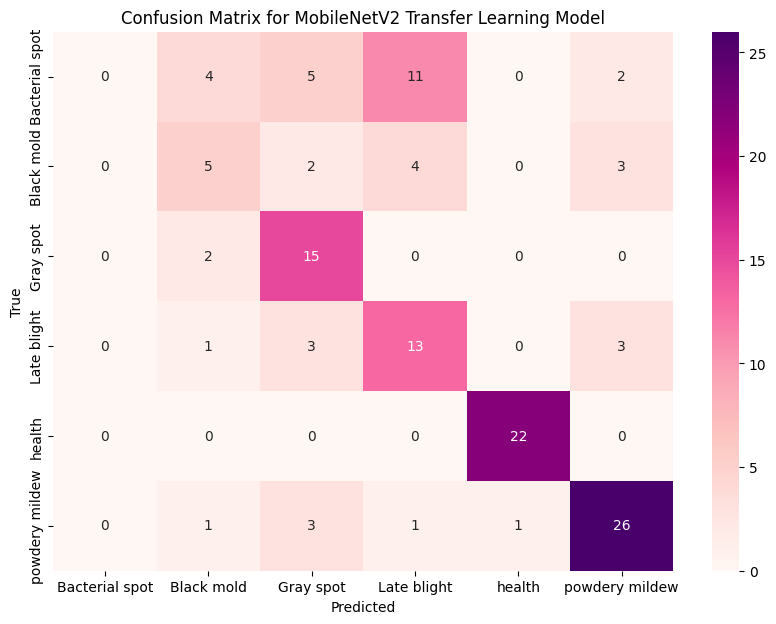

Classification Report for MobileNetV2 Transfer Learning Model:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        22
           1       0.38      0.36      0.37        14
           2       0.54      0.88      0.67        17
           3       0.45      0.65      0.53        20
           4       0.96      1.00      0.98        22
           5       0.76      0.81      0.79        32

    accuracy                           0.64       127
   macro avg       0.51      0.62      0.56       127
weighted avg       0.54      0.64      0.58       127



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Confusion Matrix and Classification Report for MobileNetV2 Transfer Learning Model
predictions_tl_mobilenet = model_tl_mobilenet.predict(test_generator)
predicted_classes = tf.argmax(predictions_tl_mobilenet, axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

cm_tl_mobilenet = confusion_matrix(true_classes, predicted_classes)
df_cm_tl_mobilenet = pd.DataFrame(cm_tl_mobilenet, index=class_labels, columns=class_labels)
plt.figure(figsize=(10, 7))
sn.heatmap(df_cm_tl_mobilenet, annot=True, cmap="RdPu")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for MobileNetV2 Transfer Learning Model')
plt.show()

print("Classification Report for MobileNetV2 Transfer Learning Model:")
print(classification_report(true_classes, predicted_classes))

4/4 [==============================] - 1s 149ms/step - loss: 7.5722 - accuracy: 0.4094
ANN Test Accuracy: 0.4094488322734833
4/4 [==============================] - 1s 140ms/step - loss: 4.4564 - accuracy: 0.7717
CNN Test Accuracy: 0.7716535329818726
4/4 [==============================] - 1s 146ms/step - loss: 1.9277 - accuracy: 0.6378
MobileNetV2 Transfer Learning Test Accuracy: 0.6377952694892883
4/4 [==============================] - 1s 172ms/step - loss: 2.4906 - accuracy: 0.5512
VGG16 Transfer Learning Test Accuracy: 0.5511810779571533
4/4 [==============================] - 1s 154ms/step - loss: 2.1234 - accuracy: 0.5512
GoogLeNet Transfer Learning Test Accuracy: 0.5511810779571533


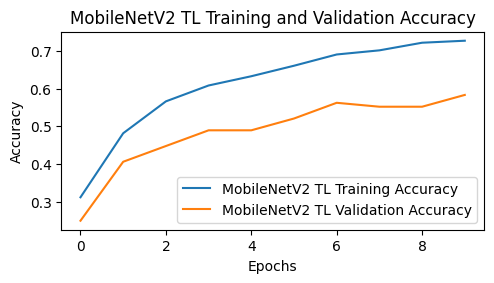

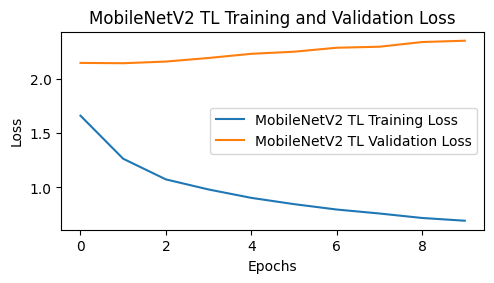

In [ ]:
# Evaluate the models on the test data
test_loss_ann, test_accuracy_ann = model_ann.evaluate(test_generator)
print("ANN Test Accuracy:", test_accuracy_ann)
test_loss_cnn, test_accuracy_cnn = model_cnn.evaluate(test_generator)
print("CNN Test Accuracy:", test_accuracy_cnn)
test_loss_tl_mobilenet, test_accuracy_tl_mobilenet = model_tl_mobilenet.evaluate(test_generator)
print("MobileNetV2 Transfer Learning Test Accuracy:", test_accuracy_tl_mobilenet)

test_loss_tl_vgg16, test_accuracy_tl_vgg16 = model_tl_vgg16.evaluate(test_generator)
print("VGG16 Transfer Learning Test Accuracy:", test_accuracy_tl_vgg16)
test_loss_tl_googlenet, test_accuracy_tl_googlenet = model_tl_googlenet.evaluate(test_generator)
print("GoogLeNet Transfer Learning Test Accuracy:", test_accuracy_tl_googlenet)






# MobileNetV2 Transfer Learning Training and Validation Accuracy
plt.figure(figsize=(12, 18))
plt.subplot(6, 2, 5)
plt.plot(history_tl_mobilenet.history['accuracy'], label='MobileNetV2 TL Training Accuracy')
plt.plot(history_tl_mobilenet.history['val_accuracy'], label='MobileNetV2 TL Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('MobileNetV2 TL Training and Validation Accuracy')
plt.legend()



# MobileNetV2 Transfer Learning Training and Validation Loss
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 18))  # Adjust the figure size as needed

plt.subplot(6, 2, 6)
plt.plot(history_tl_mobilenet.history['loss'], label='MobileNetV2 TL Training Loss')
plt.plot(history_tl_mobilenet.history['val_loss'], label='MobileNetV2 TL Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('MobileNetV2 TL Training and Validation Loss')
plt.legend()

plt.show()

4/4 [==============================] - 1s 142ms/step


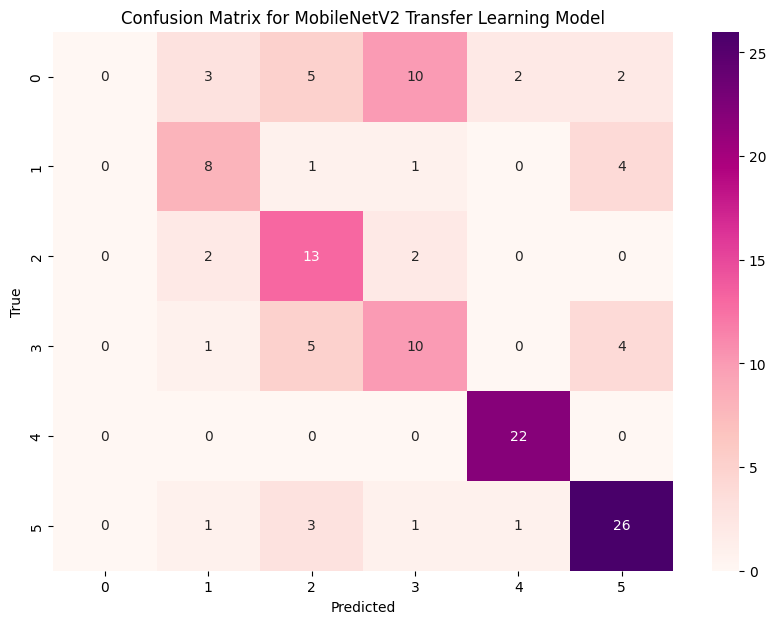

Classification Report for MobileNetV2 Transfer Learning Model:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        22
           1       0.53      0.57      0.55        14
           2       0.48      0.76      0.59        17
           3       0.42      0.50      0.45        20
           4       0.88      1.00      0.94        22
           5       0.72      0.81      0.76        32

    accuracy                           0.62       127
   macro avg       0.51      0.61      0.55       127
weighted avg       0.52      0.62      0.57       127



In [47]:

import numpy as np

# Confusion Matrix and Classification Report for MobileNetV2 Transfer Learning Model
predictions_tl_mobilenet = np.argmax(model_tl_mobilenet.predict(test_generator), axis=1)
cm_tl_mobilenet = confusion_matrix(test_generator.classes, predictions_tl_mobilenet)
df_cm_tl_mobilenet = pd.DataFrame(cm_tl_mobilenet, index=[i for i in range(6)], columns=[i for i in range(6)])
plt.figure(figsize=(10, 7))
sn.heatmap(df_cm_tl_mobilenet, annot=True, cmap="RdPu")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for MobileNetV2 Transfer Learning Model')
plt.show()

print("Classification Report for MobileNetV2 Transfer Learning Model:")
print(classification_report(test_generator.classes, predictions_tl_mobilenet, zero_division=0))

4/4 [==============================] - 1s 214ms/step


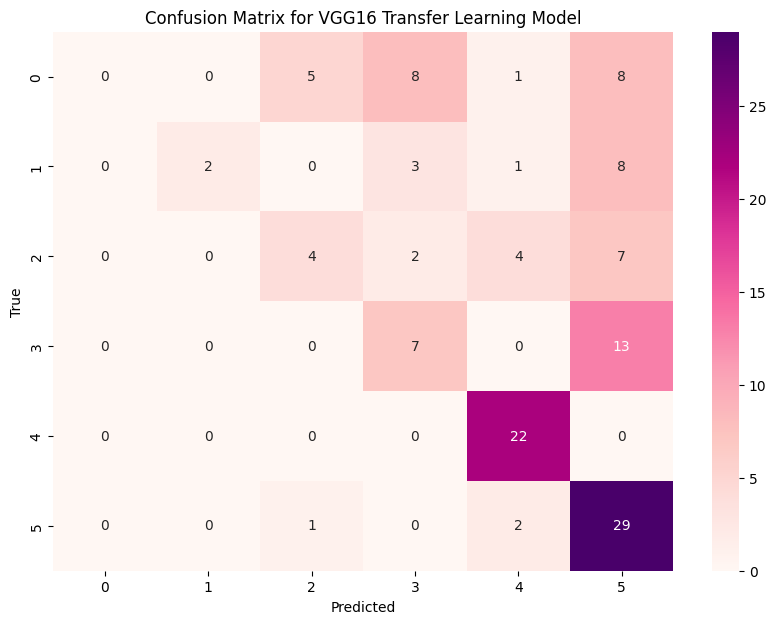

Classification Report for VGG16 Transfer Learning Model:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00        22
           1       1.00      0.14      0.25        14
           2       0.40      0.24      0.30        17
           3       0.35      0.35      0.35        20
           4       0.73      1.00      0.85        22
           5       0.45      0.91      0.60        32

    accuracy                           0.50       127
   macro avg       0.65      0.44      0.39       127
weighted avg       0.63      0.50      0.42       127

4/4 [==============================] - 1s 288ms/step


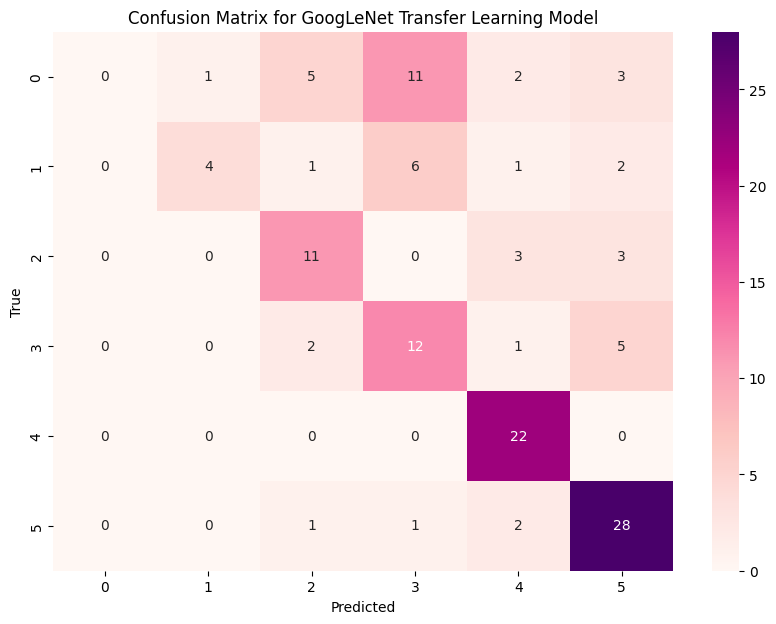

Classification Report for GoogLeNet Transfer Learning Model:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00        22
           1       0.80      0.29      0.42        14
           2       0.55      0.65      0.59        17
           3       0.40      0.60      0.48        20
           4       0.71      1.00      0.83        22
           5       0.68      0.88      0.77        32

    accuracy                           0.61       127
   macro avg       0.69      0.57      0.52       127
weighted avg       0.69      0.61      0.54       127



In [49]:

# Confusion Matrix and Classification Report for VGG16 Transfer Learning Model
predictions_tl_vgg16 = np.argmax(model_tl_vgg16.predict(test_generator), axis=1)
cm_tl_vgg16 = confusion_matrix(test_generator.classes, predictions_tl_vgg16)
df_cm_tl_vgg16 = pd.DataFrame(cm_tl_vgg16, index=[i for i in range(6)], columns=[i for i in range(6)])
plt.figure(figsize=(10, 7))
sn.heatmap(df_cm_tl_vgg16, annot=True, cmap="RdPu")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for VGG16 Transfer Learning Model')
plt.show()

print("Classification Report for VGG16 Transfer Learning Model:")
print(classification_report(test_generator.classes, predictions_tl_vgg16, zero_division=1))

# Confusion Matrix and Classification Report for GoogLeNet Transfer Learning Model
predictions_tl_googlenet = np.argmax(model_tl_googlenet.predict(test_generator), axis=1)
cm_tl_googlenet = confusion_matrix(test_generator.classes, predictions_tl_googlenet)
df_cm_tl_googlenet = pd.DataFrame(cm_tl_googlenet, index=[i for i in range(6)], columns=[i for i in range(6)])
plt.figure(figsize=(10, 7))
sn.heatmap(df_cm_tl_googlenet, annot=True, cmap="RdPu")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for GoogLeNet Transfer Learning Model')
plt.show()

print("Classification Report for GoogLeNet Transfer Learning Model:")
print(classification_report(test_generator.classes, predictions_tl_googlenet, zero_division=1))

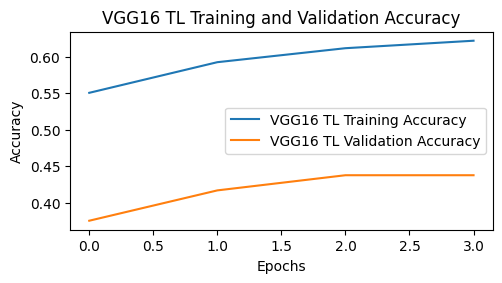

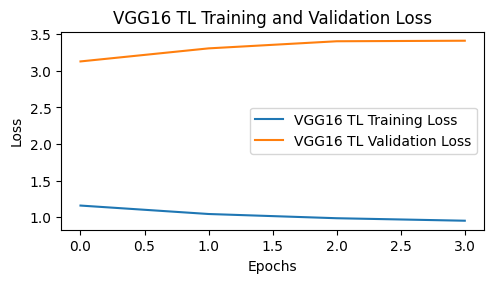

In [43]:
# VGG16 Transfer Learning Training and Validation Accuracy
plt.figure(figsize=(12, 18))
plt.subplot(6, 2, 7)
plt.plot(history_tl_vgg16.history['accuracy'], label='VGG16 TL Training Accuracy')
plt.plot(history_tl_vgg16.history['val_accuracy'], label='VGG16 TL Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('VGG16 TL Training and Validation Accuracy')
plt.legend()
# VGG16 Transfer Learning Training and Validation Loss
plt.figure(figsize=(12, 18))
plt.subplot(6, 2, 8)
plt.plot(history_tl_vgg16.history['loss'], label='VGG16 TL Training Loss')
plt.plot(history_tl_vgg16.history['val_loss'], label='VGG16 TL Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('VGG16 TL Training and Validation Loss')
plt.legend()

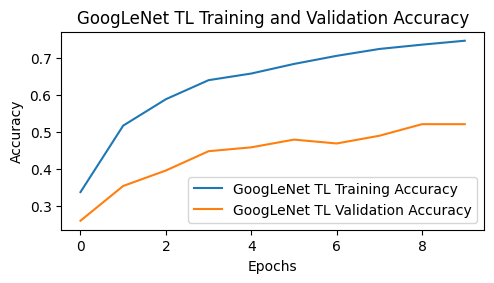

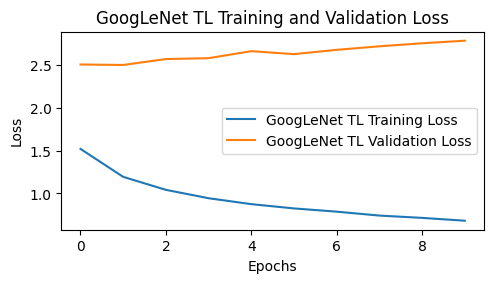

In [44]:
# GoogLeNet Transfer Learning Training and Validation Accuracy
plt.figure(figsize=(12, 18))
plt.subplot(6, 2, 9)
plt.plot(history_tl_googlenet.history['accuracy'], label='GoogLeNet TL Training Accuracy')
plt.plot(history_tl_googlenet.history['val_accuracy'], label='GoogLeNet TL Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('GoogLeNet TL Training and Validation Accuracy')
plt.legend()
# GoogLeNet Transfer Learning Training and Validation Loss
plt.figure(figsize=(12, 18))
plt.subplot(6, 2, 10)
plt.plot(history_tl_googlenet.history['loss'], label='GoogLeNet TL Training Loss')
plt.plot(history_tl_googlenet.history['val_loss'], label='GoogLeNet TL Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('GoogLeNet TL Training and Validation Loss')
plt.legend()
plt.show()

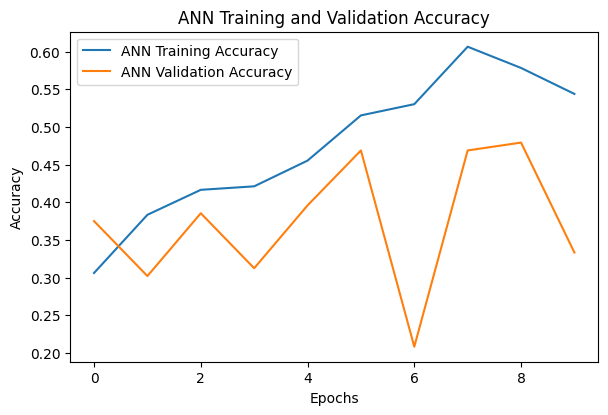

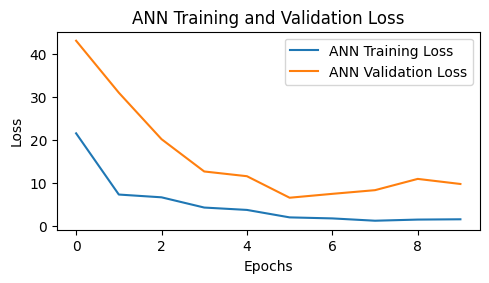

In [45]:

# Plot accuracy and loss curves for all models

plt.figure(figsize=(15, 30))
# ANN Training and Validation Accuracy
plt.subplot(6, 2, 1)
plt.plot(history_ann.history['accuracy'], label='ANN Training Accuracy')
plt.plot(history_ann.history['val_accuracy'], label='ANN Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('ANN Training and Validation Accuracy')
plt.legend()
# ANN Training and Validation Loss
plt.figure(figsize=(12, 18))
plt.subplot(6, 2, 2)
plt.plot(history_ann.history['loss'], label='ANN Training Loss')
plt.plot(history_ann.history['val_loss'], label='ANN Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('ANN Training and Validation Loss')
plt.legend()

<Figure size 1500x3000 with 0 Axes>

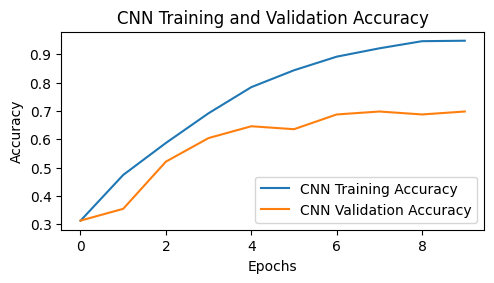

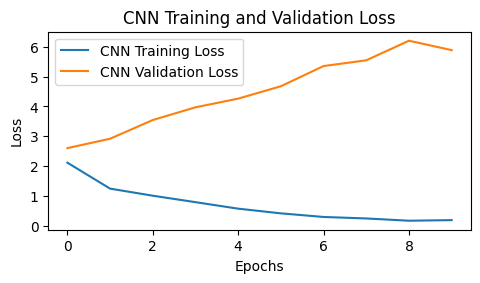

In [ ]:
plt.figure(figsize=(15, 30))
# CNN Training and Validation Accuracy
plt.figure(figsize=(12, 18))
plt.subplot(6, 2, 3)
plt.plot(history_cnn.history['accuracy'], label='CNN Training Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='CNN Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('CNN Training and Validation Accuracy')
plt.legend()

# CNN Training and Validation Loss
plt.figure(figsize=(12, 18))
plt.subplot(6, 2, 4)
plt.plot(history_cnn.history['loss'], label='CNN Training Loss')
plt.plot(history_cnn.history['val_loss'], label='CNN Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('CNN Training and Validation Loss')
plt.legend()

In [ ]:
# Evaluate the models on the test data
test_loss_ann, test_accuracy_ann = model_ann.evaluate(test_generator)
print("ANN Test Accuracy:", test_accuracy_ann)
test_loss_cnn, test_accuracy_cnn = model_cnn.evaluate(test_generator)
print("CNN Test Accuracy:", test_accuracy_cnn)

4/4 [==============================] - 1s 232ms/step - loss: 7.5722 - accuracy: 0.4094
ANN Test Accuracy: 0.4094488322734833
4/4 [==============================] - 1s 320ms/step - loss: 4.4564 - accuracy: 0.7717
CNN Test Accuracy: 0.7716535329818726


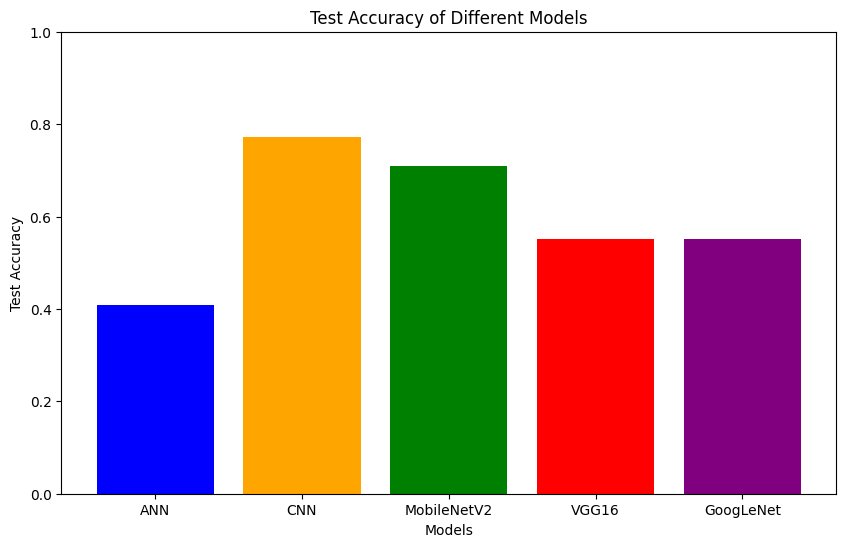

In [46]:

import matplotlib.pyplot as plt

# List of models and their test accuracies
models = ["ANN", "CNN", "MobileNetV2", "VGG16", "GoogLeNet"]
test_accuracies = [test_accuracy_ann, test_accuracy_cnn, test_accuracy_tl_mobilenet, test_accuracy_tl_vgg16, test_accuracy_tl_googlenet]

# Plotting the test accuracies
plt.figure(figsize=(10, 6))
plt.bar(models, test_accuracies, color=['blue', 'orange', 'green', 'red', 'purple'])
plt.xlabel('Models')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy of Different Models')
plt.ylim(0, 1)  # Set y-axis limit to ensure visibility of bars
plt.show()